30 баллов

Рассмотрим задачу минимизации кусочно-линейной функции на сфере
\begin{equation}
\begin{split}
&\min_{x\in R^n} \left \{ f(x) = \max_{1 \leq i \leq k} (a_i^Tx -b_i) \right \}\\
&\text{subject to}\\
&\|x-x_0\|_2^2 \leq \sigma^2
\end{split}
\end{equation}



Часть 1


a) Постройте сглаженную версию целевой функции $f_{\mu}(x)$ с параметром гладкости $\mu$


б) Реализуйте быстрый градиентный метод из статьи (Nesterov, 2005)

https://www.math.ucdavis.edu/~sqma/MAT258A_Files/Nesterov-2005.pdf

# Решение

Нужно представить $f(x)$ в виде 
$$
f(x) = \hat f(x) + \max_{u\in Q_2}\left( <Ax,u> - \hat \phi(u) \right)
$$
Заметим, что 
$$
f(x) = \max_{1 \leq i \leq k} (a_i^Tx -b_i) = \max_{u \in \Delta_k}  \sum_{i=1}^k u_i(a_i^Tx -b_i) = \max_{u \in \Delta_k} \left( <Ax,u> - <u,b>\right ),\ \text{где}\ A \in R^{k\times n},\ \text{i-я строчка матрицы }A \text{ - это } a_i.
$$
То есть $Q_2 = \Delta_k,\ \hat f(x)=0,\ \hat \phi(u) = <u,b>.$

Тогда
$$
f_{\mu}(x) = \max_{u\in Q_2}\left( <Ax,u> - \hat \phi(u) - \mu d_2(u)\right) = \max_{u\in \Delta_k}\left( <Ax,u> - <u,b> - \mu d_2(u)\right).
$$

Пусть $$
d_2(u) = \sum_{i=1}^k u_i \ln u_i + \ln k,\ \sigma_2 = 1,\ D_2 = \ln k.
$$

В этом случае 
$$
u^*(x) = \arg \max_{u\in \Delta_k}\left( <Ax,u> - <u,b> - \mu \sum_{i=1}^k u_i \ln u_i -\mu \ln k\right) = \frac{\exp{\frac{Ax-b}{\mu}}}{\sum_{i=1}^k \exp{\frac{a_i^Tx-b_i}{\mu}} } .
$$

Следовательно, 
$$
f_{\mu}(x) = \mu \ln \frac{1}{k}\left( \sum_{i=1}^k \exp{\frac{a_i^Tx-b_i}{\mu}} \right)
$$
$$
f_{\mu}(x)' = A^Tu^*(x) = A^T\frac{\exp{\frac{Ax-b}{\mu}}}{\sum_{i=1}^k \exp{\frac{a_i^Tx-b_i}{\mu}} } 
$$

$$ Q_1 = \{x: \|x-x_0\|_2^2 \leq \sigma^2\}$$
$$
y_k = \arg \min_{x \in Q_1} \{ <f_{\mu}(x_k)',x-x_k> +\frac{1}{2}L\|x-x_k\|^2\} = \arg \min_{x \in Q_1} \{ <f_{\mu}(x_k)',x> +\frac{1}{2}L\|x-x_k\|^2\} = proj_{Q_1}(x_k - \frac{f_{\mu}(x_k)'}{L})
$$

Пусть 
$$
d_1(x) = \frac{1}{2}\|x-x_0\|^2_2,\ \sigma_1 = 1,\ D_1 = \frac{\sigma^2}{2}.
$$

$$
z_k = \arg \min_{x \in Q_1} \left\{ \sum_{i=0}^k \frac{i+1}{2}(f_{\mu}(x_i)+<f_{\mu}(x_i)',x-x_i>) +\frac{L}{\sigma_1}d_1(x) \right \} = \arg \min_{x \in Q_1} \left\{ \sum_{i=0}^k \frac{i+1}{2}<f_{\mu}(x_i)',x> +L \frac{1}{2}\|x-x_0\|^2_2 \right \}  = proj_{Q_1}(x_0 - \frac{1}{L} \sum_{i=0}^k \frac{i+1}{2}f_{\mu}(x_i)').
$$

Посчитаем $proj_{Q_1}(x)$.
$$
\min_{z} \frac{1}{2} \|z-x \|^2_2,\ \|z-x_0\|^2_2 -\sigma^2 \le 0.
$$
$$
L = \frac{1}{2} \|z-x \|^2_2 + \lambda (\|z-x_0\|^2_2 -\sigma^2 )
$$
$$
z - x + \lambda(z-x_0) = 0,\ \lambda \ge 0,\ \|z-x_0\|^2_2 -\sigma^2 \le 0,\ \lambda (\|z-x_0\|^2_2 -\sigma^2 )=0
$$
Отсюда $$z = \frac{x+\lambda x_0}{1+\lambda}$$
1) Пусть $x\in Q_1$. Тогда $$\lambda = 0,\ z=x .$$
2) Пусть $x\notin Q_1.$ Тогда 
$$\lambda \ne 0,\ \|z-x_0\|^2_2 -\sigma^2 =0.$$
Отсюда
$$
\lambda = \frac{\|x-x_0\|_2}{\sigma} -1,\ z = \frac{x + \left(\frac{\|x-x_0\|_2}{\sigma} -1\right)x_0}{\frac{\|x-x_0\|_2}{\sigma}}.
$$
Пусть в пространствах $Q_1$ и $Q_2$ нормы следующие 
$$
\|x\|_1= \sqrt{\sum_{i=1}^n  x_i^2 },\ \|x\|_2 = \sqrt{\sum_{i=1}^n  x_i^2 },\ \|A\|^2_{1,2} = \lambda_{max}^{1/2}(A^TA).
$$
$$
L = \frac{1}{\mu \sigma_2}\|A\|^2_{1,2} = \frac{1}{\mu}  \lambda_{max}^{1/2}(A^TA).
$$
$$
%\mu = \mu(N) = \frac{2\|A\|_{1,2}}{N+1}\sqrt \frac{D_1}{\sigma_1 \sigma_2 D_2} = \frac{2 \lambda_{max}^{1/2}(A^TA)}{N+1}\sigma \sqrt \frac{1}{2 \ln k}.
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
k, n = 10, 100
np.random.seed(12345)
A = np.random.randn(k, n)
b = np.random.randn(k)

In [3]:
max_iter = 500
sigma = 1
x_0 = np.random.randn(n)

norm = np.sqrt(np.max(np.linalg.eigh(A.T @ A)[0]))
mu = 1
L = norm / mu

In [4]:
f_mu = lambda x, mu: mu * np.log(np.sum(np.exp((A @ x - b) / mu))/k)

In [5]:
f_mu_grad = lambda x, mu: A.T @ np.exp((A @ x - b) / mu) / np.sum(np.exp((A @ x - b) / mu))

In [6]:
def proj(x, x_0, sigma):
    if np.linalg.norm(x - x_0) <= sigma:
        return x
    else:
        return (x + x_0 * (np.linalg.norm(x - x_0)/sigma - 1)) / (np.linalg.norm(x - x_0)/sigma)

In [7]:
def Nesterov_method(f_mu_grad, x0, num_iter):
    conv = [x0.copy()]
    grad = [f_mu_grad(x0.copy(),mu)]
    x = x0.copy()
    time_ = [0]
    start_time  = time.time()
    for i in range(num_iter):
        y = proj(x - grad[-1]/L , x_0, sigma) #x_0 - sphere center
        z = proj(x_0 - np.sum([(j+1) * grad[j] / 2 for j in range(len(grad))]), x_0, sigma)
        x = z * 2 / (i+3)  + y * (i+1) / (i+3)
        conv.append(x.copy())
        grad.append(f_mu_grad(x.copy(),mu))
        time_.append(time.time() - start_time)
    return x, conv, time_

# Проверка работы алгоритма

In [8]:
x0 = np.random.randn(n)

In [9]:
x_nest, conv_nest, time_nest = Nesterov_method(f_mu_grad, x0, max_iter)

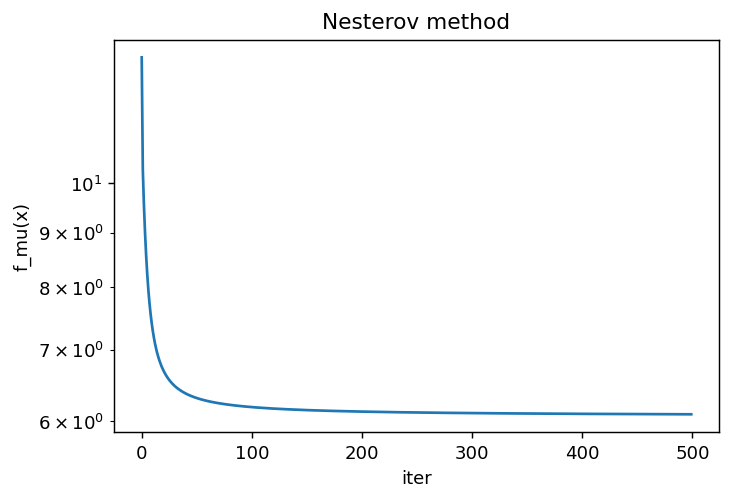

In [10]:
plt.figure(figsize = (6, 4), dpi = 130)
plt.semilogy([f_mu(x,mu) for x in conv_nest[1:]])
plt.ylabel("f_mu(x)")
plt.xlabel("iter")
plt.title("Nesterov method")
plt.show()

Часть 2

Указанная выше задача может быть записана в эквивалентном виде

\begin{equation}
\begin{split}
&\min_{x\in R^n, t} t \\
&\text{subject to}\\
&a_i^Tx -b_i \leq t, \quad 1\leq i\leq k\\
&\|x-x_0\|_2^2 \leq \sigma^2
\end{split}
\end{equation}

Для данной задачи напишите реализацию барьерного метода (включая метод Ньютона для внутренней операции)

Главы 9 и 11 в "Convex Optimization" Boyd

# Решение

Сначала избавимся от ограничений типа неравенств, записав исходную задачу в эквивалентом виде:

\begin{equation}
\min_{x\in R^n, t} t + \sum_{i=1}^k I(a_i^Tx -b_i - t) + I(\|x-x_0\|_2^2 - \sigma^2),
\end{equation}

где $$I(u) = \begin{cases} 
0,\ u\le 0,\\
\infty,\ u>0.
\end{cases}
$$

Приблизим $I(u)$ логарифмическим барьером $\hat I(u):=-s\log(-u),$ при $s\to 0\ \hat I(u)\to I(u).$ 

Таким образом, получим следующую задачу:
\begin{equation}
\min_{x\in R^n, t} \tilde f(x,t) = \min_{x\in R^n, t} t - \sum_{i=1}^k s \log (-a_i^Tx +b_i + t) -s \log (-\|x-x_0\|_2^2 + \sigma^2).
\end{equation}

Решим её с помощью метода Ньютона, то есть заменим $\tilde f(x,t)$ на её квадратичную аппроксимацию. Тогда получим следующую систему уравнений:

$$
\tilde f(x,t)' = \left(s\sum_{i=1}^k \frac{-a_i}{a_i^Tx-b_i-t}- s\frac{2(x-x_0)}{\|x-x_0\|_2^2 - \sigma^2}, 1+ s\sum_{i=1}^k \frac{1}{a_i^Tx-b_i-t}\right) 
$$

\begin{equation}
\tilde f(x,t)'' = 
\begin{pmatrix}
s\sum_{i=1}^k \frac{a_i^Ta_i}{(a_i^Tx-b_i-t)^2}-s\frac{2 E (\|x-x_0\|^2_2 -\sigma^2) - 4(x-x_0)^T(x-x_0) }{(\|x-x_0\|^2_2 -\sigma^2)^2} & s\sum_{i=1}^k \frac{-a_i}{(a_i^Tx-b_i-t)^2}\\
s\sum_{i=1}^k \frac{-a_i^T}{(a_i^Tx-b_i-t)^2}& s\sum_{i=1}^k \frac{1}{(a_i^Tx-b_i-t)^2} \\
\end{pmatrix}
\end{equation}

$$
\tilde f(x,t)''y = -\tilde f(x,t)'.
$$

Отсюда
$$
(x_{k+1},t_{k+1}) = (x_{k},t_{k}) - (\tilde f(x_{k},t_k)'')^{-1} \tilde f(x_k,t_k)'.
$$

При 
$
s\to 0\ (x,t)^*(s) \to (x,t).
$
Поэтому будем решать систему методом Ньютона для каждого s и при этом уменьшать $s.$

Newton decrement $$\frac{1}{2} y^T \tilde f(x,t)'' y
$$
-это показатель того, на сколько мы уменьшили функцию. 

In [11]:
s = 0.1
x0 = x_0 + np.random.normal(0, sigma/n, n)
t0 = np.max(A @ x0 - b) + 0.1

In [12]:
max_iter = 500
alpha = 0.01
nu = 0.01
tol_barrier = 1e-2 
tol_newton = 1e-5

In [13]:
f_tilde = lambda s, x, t: t - np.sum(s* np.log(-A @ x + b + t)) - s*np.log(-np.linalg.norm(x-x_0)**2 + sigma**2)

In [14]:
f_tilde_grad = lambda s, x, t: np.hstack([np.sum([-s*A[i]/(A[i] @ x - b[i] - t) for i in range(k)], axis = 0) - s*2*(x-x_0)/(np.linalg.norm(x-x_0)**2-sigma**2),1 + np.sum(s / (A @ x - b - t))]) 

In [15]:
f_tilde_hess = lambda s, x, t: np.vstack([np.hstack([np.sum([s * (A[i].reshape(-1,1) @ A[i].reshape(1,-1)) / (A[i] @ x - b[i] -t)**2 for i in range(k)],axis = 0) - s*(2 * (np.linalg.norm(x-x_0)**2 - sigma**2) * np.eye(n) - 4 * (x-x_0).reshape(-1,1) @ (x-x_0).reshape(1,-1)) / (np.linalg.norm(x-x_0)**2 - sigma**2)**2, np.sum([-s*A[i]/(A[i] @ x - b[i] - t)**2 for i in range(k)], axis = 0).reshape(-1,1)]), np.hstack([np.sum([-s*A[i]/(A[i] @ x - b[i] - t)**2 for i in range(k)], axis = 0) , np.sum(s / (A @ x - b - t)**2)]) ])

In [16]:
def Interior_point_method(f_tilde_grad, f_tilde_hess, x0, t0, s, alpha, nu, tol_barrier, tol_newton, num_iter):    
    x = x0.copy()   
    t = t0.copy()
    conv_x = [x0.copy()]
    conv_t = [t0.copy()]
    conv_s = [s]
    newton_decrement_hist = []
    flag = True
    time_ = [0]
    start_time  = time.time()
    while (flag and ((k+1)*s > tol_barrier)) : # зазор двойственности, то есть уменьшаем s, пока (k+1)*s > tol_barrier, k+1 -количество неравенств
        
        # итерация метода Ньютона 
        for i in range(num_iter):
            
            
            H = f_tilde_hess(s, x, t)
            G = f_tilde_grad(s, x, t)
            y = np.linalg.solve(H, -G)
            x = x + alpha*y[:-1]
            t = t + alpha*y[-1]
            
            # проверка на значение функции(если для нового s значение функции увеличилось, то полностью заканчиваем алгоритм) 
            if (i == 0):
                if f_tilde(s , x, t) > f_tilde(conv_s[-1], conv_x[-1], conv_t[-1]):
                    flag = False
                    break
                
            # сохраняем найденные точки 
            conv_x.append(x)
            conv_t.append(t)
            conv_s.append(s)
            newton_decrement_hist.append(y @ H @ y)
            
            time_.append(time.time() - start_time)
            # проверка на Newton decrement(когда функция перестаёт уменьшаться, то выходим)
            if ((len(newton_decrement_hist) >1) and 
                (np.abs(newton_decrement_hist[-1]-newton_decrement_hist[-2]) < tol_newton)):
                break
        
        
        # уменьшаем параметр s
        s = s / (1 + 1/(13 * np.sqrt(nu)))        
    return x, conv_x, conv_t, conv_s, time_

# Проверка работы алгоритма

In [17]:
x_int_point, conv_x_int_point, conv_t_int_point, conv_s_int_point, time_int_point =  Interior_point_method(f_tilde_grad, f_tilde_hess, x0, t0, s, alpha, nu, tol_barrier, tol_newton, max_iter)

In [18]:
values = []
for i in range(len(conv_x_int_point)-1):
    values.append(f_tilde(conv_s_int_point[i],conv_x_int_point[1+i],conv_t_int_point[1+i]))

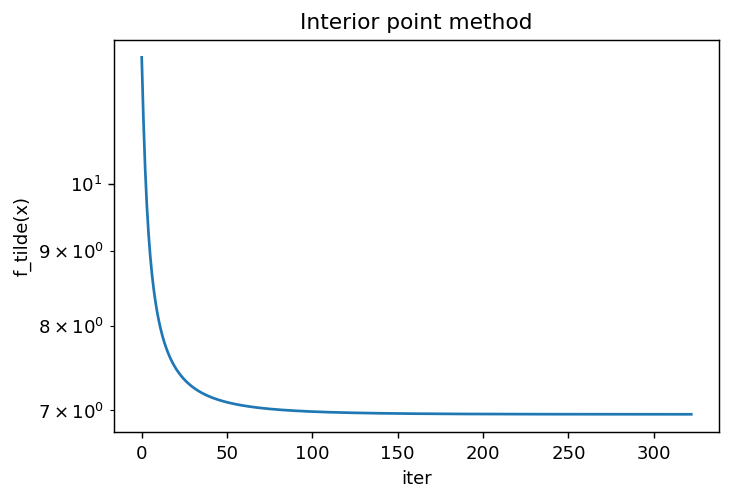

In [19]:
plt.figure(figsize = (6, 4), dpi = 130)
plt.semilogy(values)
plt.ylabel("f_tilde(x)")
plt.xlabel("iter")
plt.title("Interior point method")
plt.show()

Часть 3

Сгенерируйте искусственные (случайные) данные для тестирования алгоритмов.

Нам хочется сравнить эффективность методов для различной размерности задачи (то есть при росте $n$ и $k$). Ограничте время вычисления на каждый инстанс 1000с.

а) Первый тест: $k=10$, $n_1=10$, $n_2 = 100$, $n_3=1000$, $n_4=10000$, $n_5=100000$ (5 сценариев).

б) Второй тест: $n=10$, $k_1=10$, $k_2 = 100$, $k_3=1000$, $k_4=10000$, $k_5=100000$ (5 сценариев).

в) Третий тест: [$n_1 = rand(10)$, $k_1 = rand(10)$], [$n_2 = rand(100)$, $k_2 = rand(100)$], [$n_3 = rand(1000)$, $k_3 = rand(1000)$], [$n_4 = rand(10000)$, $k_4 = rand(10000)$], [$n_5 = rand(100000)$, $k_5 = rand(100000)$] (5 сценариев).

В итоге у Вас должно получиться 15 сценариев (15 вариантов задачи). Можно взять $\sigma=1$, но $x_0$ сгенерируйте  случайно (не нужно делать его равным нуль-вектору).

Для каждого конкретного сценария постройте рисунок с графиками, описывающими работу алгоритма: по оси $x$ отложено время (работы алгоритма), а по оси $y$ значение целевой функции для каждого из алгоритмов.

Напишите свои выводы по сравнению алгоритмов (возможно, Вам захочется провести и другие тесты...)

# Тесты

# a) $k=10$, $n_1=10$, $n_2 = 100$, $n_3=1000$, $n_4=10000$, $n_5=100000$

In [30]:
np.random.seed(1234567)

In [31]:
k = 10
n = 10

In [32]:
A = np.random.randn(k, n)
b = np.random.randn(k)
x_0 = np.random.randn(n)

In [33]:
max_iter = 100
sigma = 1

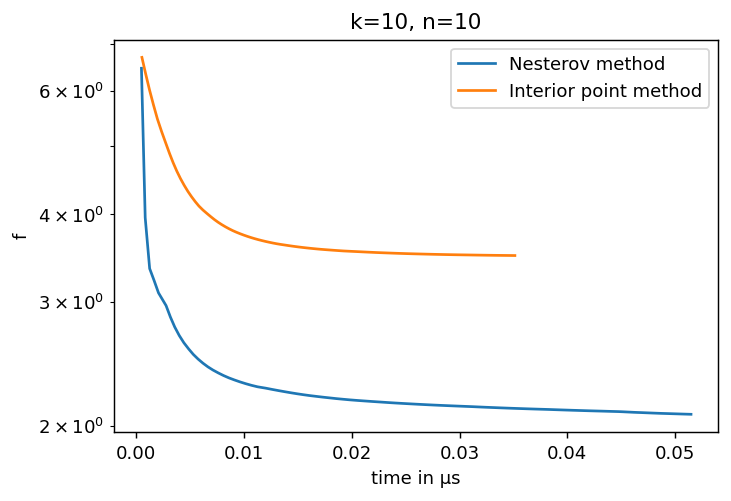

CPU times: user 339 ms, sys: 3.89 ms, total: 343 ms
Wall time: 342 ms


In [34]:
%%time

# параметры для метода Нестерова
norm = np.sqrt(np.max(np.linalg.eigh(A.T @ A)[0]))
mu = 1
L = norm / mu
f_mu = lambda x, mu: mu * np.log(np.sum(np.exp((A @ x - b) / mu))/k)
f_mu_grad = lambda x, mu: A.T @ np.exp((A @ x - b) / mu) / np.sum(np.exp((A @ x - b) / mu))

x0 = np.random.randn(n)
x_nest, conv_nest, time_nest = Nesterov_method(f_mu_grad, x0, max_iter)

# параметры для метода нутренней точки
s = 0.1
x0 = x_0 + np.random.normal(0, sigma/n, n)
t0 = np.max(A @ x0 - b) + 0.1

alpha = 0.01
nu = 0.01
tol_barrier = 1e-2 
tol_newton = 1e-5

f_tilde = lambda s, x, t: t - np.sum(s* np.log(-A @ x + b + t)) - s*np.log(-np.linalg.norm(x-x_0)**2 + sigma**2)
f_tilde_grad = lambda s, x, t: np.hstack([np.sum([-s*A[i]/(A[i] @ x - b[i] - t) for i in range(k)], axis = 0) - s*2*(x-x_0)/(np.linalg.norm(x-x_0)**2-sigma**2),1 + np.sum(s / (A @ x - b - t))]) 
f_tilde_hess = lambda s, x, t: np.vstack([np.hstack([np.sum([s * (A[i].reshape(-1,1) @ A[i].reshape(1,-1)) / (A[i] @ x - b[i] -t)**2 for i in range(k)],axis = 0) - s*(2 * (np.linalg.norm(x-x_0)**2 - sigma**2) * np.eye(n) - 4 * (x-x_0).reshape(-1,1) @ (x-x_0).reshape(1,-1)) / (np.linalg.norm(x-x_0)**2 - sigma**2)**2, np.sum([-s*A[i]/(A[i] @ x - b[i] - t)**2 for i in range(k)], axis = 0).reshape(-1,1)]), np.hstack([np.sum([-s*A[i]/(A[i] @ x - b[i] - t)**2 for i in range(k)], axis = 0) , np.sum(s / (A @ x - b - t)**2)]) ])

x_int_point, conv_x_int_point, conv_t_int_point, conv_s_int_point, time_int_point =  Interior_point_method(f_tilde_grad, f_tilde_hess, x0, t0, s, alpha, nu, tol_barrier, tol_newton, max_iter)

values = []
for i in range(len(conv_x_int_point)-1):
    values.append(f_tilde(conv_s_int_point[i],conv_x_int_point[1+i],conv_t_int_point[1+i]))
    
plt.figure(figsize = (6, 4), dpi = 130)
plt.semilogy(time_nest[1:],[f_mu(x,mu) for x in conv_nest[1:]], label = "Nesterov method")
plt.semilogy(time_int_point[1:], values, label = "Interior point method")
plt.ylabel("f")
plt.xlabel("time in μs")
plt.title("k="+str(k)+", n="+str(n))
plt.legend()
plt.show()

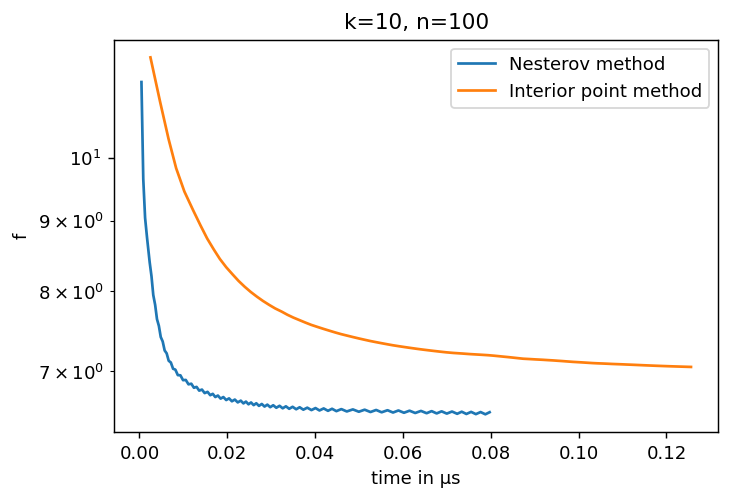

CPU times: user 1 s, sys: 3.42 ms, total: 1.01 s
Wall time: 411 ms


In [35]:
%%time

k = 10
n = 100

A = np.random.randn(k, n)
b = np.random.randn(k)
x_0 = np.random.randn(n)

# параметры для метода Нестерова
norm = np.sqrt(np.max(np.linalg.eigh(A.T @ A)[0]))
mu = 1
L = norm / mu
f_mu = lambda x, mu: mu * np.log(np.sum(np.exp((A @ x - b) / mu))/k)
f_mu_grad = lambda x, mu: A.T @ np.exp((A @ x - b) / mu) / np.sum(np.exp((A @ x - b) / mu))

x0 = np.random.randn(n)
x_nest, conv_nest, time_nest = Nesterov_method(f_mu_grad, x0, max_iter)

# параметры для метода нутренней точки
s = 0.1
x0 = x_0 + np.random.normal(0, sigma/n, n)
t0 = np.max(A @ x0 - b) + 0.1

alpha = 0.01
nu = 0.01
tol_barrier = 1e-2 
tol_newton = 1e-5

f_tilde = lambda s, x, t: t - np.sum(s* np.log(-A @ x + b + t)) - s*np.log(-np.linalg.norm(x-x_0)**2 + sigma**2)
f_tilde_grad = lambda s, x, t: np.hstack([np.sum([-s*A[i]/(A[i] @ x - b[i] - t) for i in range(k)], axis = 0) - s*2*(x-x_0)/(np.linalg.norm(x-x_0)**2-sigma**2),1 + np.sum(s / (A @ x - b - t))]) 
f_tilde_hess = lambda s, x, t: np.vstack([np.hstack([np.sum([s * (A[i].reshape(-1,1) @ A[i].reshape(1,-1)) / (A[i] @ x - b[i] -t)**2 for i in range(k)],axis = 0) - s*(2 * (np.linalg.norm(x-x_0)**2 - sigma**2) * np.eye(n) - 4 * (x-x_0).reshape(-1,1) @ (x-x_0).reshape(1,-1)) / (np.linalg.norm(x-x_0)**2 - sigma**2)**2, np.sum([-s*A[i]/(A[i] @ x - b[i] - t)**2 for i in range(k)], axis = 0).reshape(-1,1)]), np.hstack([np.sum([-s*A[i]/(A[i] @ x - b[i] - t)**2 for i in range(k)], axis = 0) , np.sum(s / (A @ x - b - t)**2)]) ])

x_int_point, conv_x_int_point, conv_t_int_point, conv_s_int_point, time_int_point =  Interior_point_method(f_tilde_grad, f_tilde_hess, x0, t0, s, alpha, nu, tol_barrier, tol_newton, max_iter)

values = []
for i in range(len(conv_x_int_point)-1):
    values.append(f_tilde(conv_s_int_point[i],conv_x_int_point[1+i],conv_t_int_point[1+i]))
    
plt.figure(figsize = (6, 4), dpi = 130)
plt.semilogy(time_nest[1:],[f_mu(x,mu) for x in conv_nest[1:]], label = "Nesterov method")
plt.semilogy(time_int_point[1:], values, label = "Interior point method")
plt.ylabel("f")
plt.xlabel("time in μs")
plt.title("k="+str(k)+", n="+str(n))
plt.legend()
plt.show()

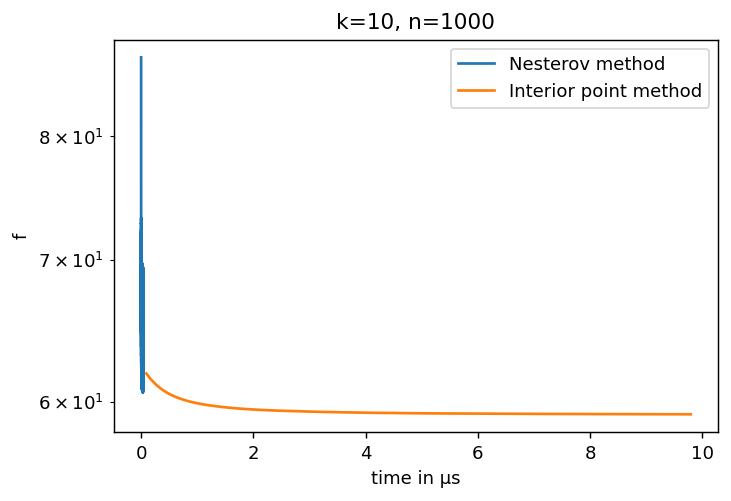

CPU times: user 38.4 s, sys: 2.63 s, total: 41 s
Wall time: 10.3 s


In [36]:
%%time

k = 10
n = 1000

A = np.random.randn(k, n)
b = np.random.randn(k)
x_0 = np.random.randn(n)

# параметры для метода Нестерова
norm = np.sqrt(np.max(np.linalg.eigh(A.T @ A)[0]))
mu = 1
L = norm / mu
f_mu = lambda x, mu: mu * np.log(np.sum(np.exp((A @ x - b) / mu))/k)
f_mu_grad = lambda x, mu: A.T @ np.exp((A @ x - b) / mu) / np.sum(np.exp((A @ x - b) / mu))

x0 = np.random.randn(n)
x_nest, conv_nest, time_nest = Nesterov_method(f_mu_grad, x0, max_iter)

# параметры для метода нутренней точки
s = 0.1
x0 = x_0 + np.random.normal(0, sigma/n, n)
t0 = np.max(A @ x0 - b) + 0.1

alpha = 0.01
nu = 0.01
tol_barrier = 1e-2 
tol_newton = 1e-5

f_tilde = lambda s, x, t: t - np.sum(s* np.log(-A @ x + b + t)) - s*np.log(-np.linalg.norm(x-x_0)**2 + sigma**2)
f_tilde_grad = lambda s, x, t: np.hstack([np.sum([-s*A[i]/(A[i] @ x - b[i] - t) for i in range(k)], axis = 0) - s*2*(x-x_0)/(np.linalg.norm(x-x_0)**2-sigma**2),1 + np.sum(s / (A @ x - b - t))]) 
f_tilde_hess = lambda s, x, t: np.vstack([np.hstack([np.sum([s * (A[i].reshape(-1,1) @ A[i].reshape(1,-1)) / (A[i] @ x - b[i] -t)**2 for i in range(k)],axis = 0) - s*(2 * (np.linalg.norm(x-x_0)**2 - sigma**2) * np.eye(n) - 4 * (x-x_0).reshape(-1,1) @ (x-x_0).reshape(1,-1)) / (np.linalg.norm(x-x_0)**2 - sigma**2)**2, np.sum([-s*A[i]/(A[i] @ x - b[i] - t)**2 for i in range(k)], axis = 0).reshape(-1,1)]), np.hstack([np.sum([-s*A[i]/(A[i] @ x - b[i] - t)**2 for i in range(k)], axis = 0) , np.sum(s / (A @ x - b - t)**2)]) ])

x_int_point, conv_x_int_point, conv_t_int_point, conv_s_int_point, time_int_point =  Interior_point_method(f_tilde_grad, f_tilde_hess, x0, t0, s, alpha, nu, tol_barrier, tol_newton, max_iter)

values = []
for i in range(len(conv_x_int_point)-1):
    values.append(f_tilde(conv_s_int_point[i],conv_x_int_point[1+i],conv_t_int_point[1+i]))
    
plt.figure(figsize = (6, 4), dpi = 130)
plt.semilogy(time_nest[1:],[f_mu(x,mu) for x in conv_nest[1:]], label = "Nesterov method")
plt.semilogy(time_int_point[1:], values, label = "Interior point method")
plt.ylabel("f")
plt.xlabel("time in μs")
plt.title("k="+str(k)+", n="+str(n))
plt.legend()
plt.show()

# б) $n=10$, $k_1=10$, $k_2 = 100$, $k_3=1000$, $k_4=10000$, $k_5=100000$

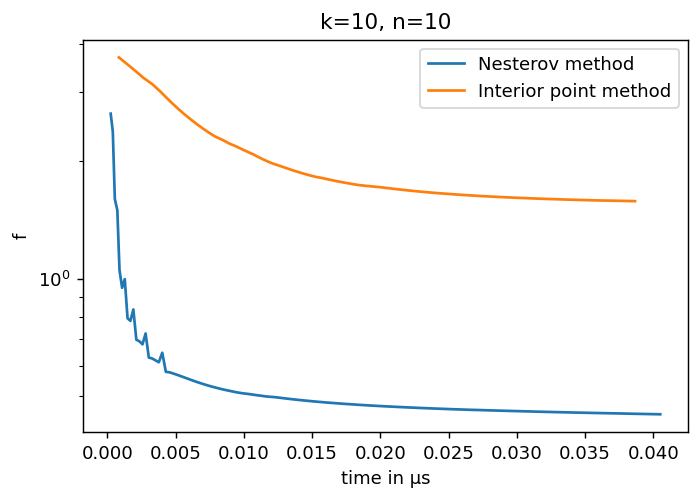

CPU times: user 263 ms, sys: 7.83 ms, total: 271 ms
Wall time: 270 ms


In [39]:
%%time

k = 10
n = 10

A = np.random.randn(k, n)
b = np.random.randn(k)
x_0 = np.random.randn(n)

# параметры для метода Нестерова
norm = np.sqrt(np.max(np.linalg.eigh(A.T @ A)[0]))
mu = 1
L = norm / mu
f_mu = lambda x, mu: mu * np.log(np.sum(np.exp((A @ x - b) / mu))/k)
f_mu_grad = lambda x, mu: A.T @ np.exp((A @ x - b) / mu) / np.sum(np.exp((A @ x - b) / mu))

x0 = np.random.randn(n)
x_nest, conv_nest, time_nest = Nesterov_method(f_mu_grad, x0, max_iter)

# параметры для метода нутренней точки
s = 0.1
x0 = x_0 + np.random.normal(0, sigma/n, n)
t0 = np.max(A @ x0 - b) + 0.1

alpha = 0.01
nu = 0.01
tol_barrier = 1e-2 
tol_newton = 1e-5

f_tilde = lambda s, x, t: t - np.sum(s* np.log(-A @ x + b + t)) - s*np.log(-np.linalg.norm(x-x_0)**2 + sigma**2)
f_tilde_grad = lambda s, x, t: np.hstack([np.sum([-s*A[i]/(A[i] @ x - b[i] - t) for i in range(k)], axis = 0) - s*2*(x-x_0)/(np.linalg.norm(x-x_0)**2-sigma**2),1 + np.sum(s / (A @ x - b - t))]) 
f_tilde_hess = lambda s, x, t: np.vstack([np.hstack([np.sum([s * (A[i].reshape(-1,1) @ A[i].reshape(1,-1)) / (A[i] @ x - b[i] -t)**2 for i in range(k)],axis = 0) - s*(2 * (np.linalg.norm(x-x_0)**2 - sigma**2) * np.eye(n) - 4 * (x-x_0).reshape(-1,1) @ (x-x_0).reshape(1,-1)) / (np.linalg.norm(x-x_0)**2 - sigma**2)**2, np.sum([-s*A[i]/(A[i] @ x - b[i] - t)**2 for i in range(k)], axis = 0).reshape(-1,1)]), np.hstack([np.sum([-s*A[i]/(A[i] @ x - b[i] - t)**2 for i in range(k)], axis = 0) , np.sum(s / (A @ x - b - t)**2)]) ])

x_int_point, conv_x_int_point, conv_t_int_point, conv_s_int_point, time_int_point =  Interior_point_method(f_tilde_grad, f_tilde_hess, x0, t0, s, alpha, nu, tol_barrier, tol_newton, max_iter)

values = []
for i in range(len(conv_x_int_point)-1):
    values.append(f_tilde(conv_s_int_point[i],conv_x_int_point[1+i],conv_t_int_point[1+i]))
    
plt.figure(figsize = (6, 4), dpi = 130)
plt.semilogy(time_nest[1:],[f_mu(x,mu) for x in conv_nest[1:]], label = "Nesterov method")
plt.semilogy(time_int_point[1:], values, label = "Interior point method")
plt.ylabel("f")
plt.xlabel("time in μs")
plt.title("k="+str(k)+", n="+str(n))
plt.legend()
plt.show()

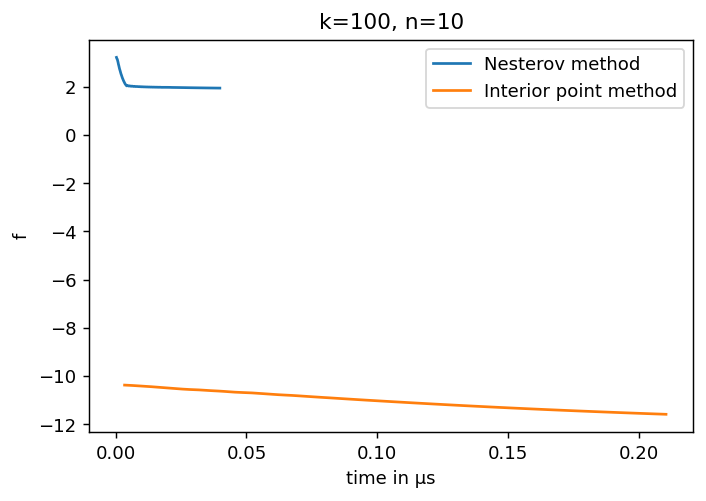

CPU times: user 355 ms, sys: 1.1 ms, total: 356 ms
Wall time: 355 ms


In [51]:
%%time

k = 100
n = 10

A = np.random.randn(k, n)
b = np.random.randn(k)
x_0 = np.random.randn(n)

# параметры для метода Нестерова
norm = np.sqrt(np.max(np.linalg.eigh(A.T @ A)[0]))
mu = 1
L = norm / mu
f_mu = lambda x, mu: mu * np.log(np.sum(np.exp((A @ x - b) / mu))/k)
f_mu_grad = lambda x, mu: A.T @ np.exp((A @ x - b) / mu) / np.sum(np.exp((A @ x - b) / mu))

x0 = np.random.randn(n)
x_nest, conv_nest, time_nest = Nesterov_method(f_mu_grad, x0, max_iter)

# параметры для метода нутренней точки
s = 0.1
x0 = x_0 + np.random.normal(0, sigma/n, n)
t0 = np.max(A @ x0 - b) + 0.1

alpha = 0.01
nu = 0.01
tol_barrier = 1e-2 
tol_newton = 1e-5

f_tilde = lambda s, x, t: t - np.sum(s* np.log(-A @ x + b + t)) - s*np.log(-np.linalg.norm(x-x_0)**2 + sigma**2)
f_tilde_grad = lambda s, x, t: np.hstack([np.sum([-s*A[i]/(A[i] @ x - b[i] - t) for i in range(k)], axis = 0) - s*2*(x-x_0)/(np.linalg.norm(x-x_0)**2-sigma**2),1 + np.sum(s / (A @ x - b - t))]) 
f_tilde_hess = lambda s, x, t: np.vstack([np.hstack([np.sum([s * (A[i].reshape(-1,1) @ A[i].reshape(1,-1)) / (A[i] @ x - b[i] -t)**2 for i in range(k)],axis = 0) - s*(2 * (np.linalg.norm(x-x_0)**2 - sigma**2) * np.eye(n) - 4 * (x-x_0).reshape(-1,1) @ (x-x_0).reshape(1,-1)) / (np.linalg.norm(x-x_0)**2 - sigma**2)**2, np.sum([-s*A[i]/(A[i] @ x - b[i] - t)**2 for i in range(k)], axis = 0).reshape(-1,1)]), np.hstack([np.sum([-s*A[i]/(A[i] @ x - b[i] - t)**2 for i in range(k)], axis = 0) , np.sum(s / (A @ x - b - t)**2)]) ])

x_int_point, conv_x_int_point, conv_t_int_point, conv_s_int_point, time_int_point =  Interior_point_method(f_tilde_grad, f_tilde_hess, x0, t0, s, alpha, nu, tol_barrier, tol_newton, max_iter)

values = []
for i in range(len(conv_x_int_point)-1):
    values.append(f_tilde(conv_s_int_point[i],conv_x_int_point[1+i],conv_t_int_point[1+i]))
    
plt.figure(figsize = (6, 4), dpi = 130)
plt.plot(time_nest[1:],[f_mu(x,mu) for x in conv_nest[1:]], label = "Nesterov method")
plt.plot(time_int_point[1:], values, label = "Interior point method")
plt.ylabel("f")
plt.xlabel("time in μs")
plt.title("k="+str(k)+", n="+str(n))
plt.legend()
plt.show()

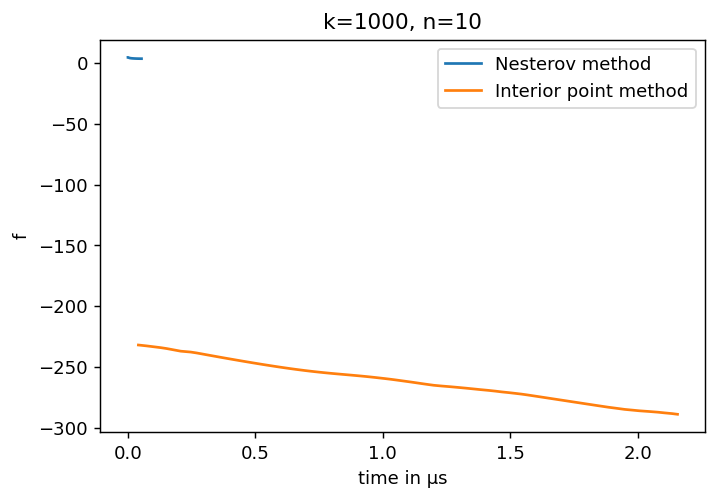

CPU times: user 3.06 s, sys: 15.6 ms, total: 3.08 s
Wall time: 2.34 s


In [55]:
%%time

k = 1000
n = 10

A = np.random.randn(k, n)
b = np.random.randn(k)
x_0 = np.random.randn(n)

# параметры для метода Нестерова
norm = np.sqrt(np.max(np.linalg.eigh(A.T @ A)[0]))
mu = 1
L = norm / mu
f_mu = lambda x, mu: mu * np.log(np.sum(np.exp((A @ x - b) / mu))/k)
f_mu_grad = lambda x, mu: A.T @ np.exp((A @ x - b) / mu) / np.sum(np.exp((A @ x - b) / mu))

x0 = np.random.randn(n)
x_nest, conv_nest, time_nest = Nesterov_method(f_mu_grad, x0, max_iter)

# параметры для метода нутренней точки
s = 0.1
x0 = x_0 + np.random.normal(0, sigma/n, n)
t0 = np.max(A @ x0 - b) + 0.1

alpha = 0.01
nu = 0.01
tol_barrier = 1e-2 
tol_newton = 1e-5

f_tilde = lambda s, x, t: t - np.sum(s* np.log(-A @ x + b + t)) - s*np.log(-np.linalg.norm(x-x_0)**2 + sigma**2)
f_tilde_grad = lambda s, x, t: np.hstack([np.sum([-s*A[i]/(A[i] @ x - b[i] - t) for i in range(k)], axis = 0) - s*2*(x-x_0)/(np.linalg.norm(x-x_0)**2-sigma**2),1 + np.sum(s / (A @ x - b - t))]) 
f_tilde_hess = lambda s, x, t: np.vstack([np.hstack([np.sum([s * (A[i].reshape(-1,1) @ A[i].reshape(1,-1)) / (A[i] @ x - b[i] -t)**2 for i in range(k)],axis = 0) - s*(2 * (np.linalg.norm(x-x_0)**2 - sigma**2) * np.eye(n) - 4 * (x-x_0).reshape(-1,1) @ (x-x_0).reshape(1,-1)) / (np.linalg.norm(x-x_0)**2 - sigma**2)**2, np.sum([-s*A[i]/(A[i] @ x - b[i] - t)**2 for i in range(k)], axis = 0).reshape(-1,1)]), np.hstack([np.sum([-s*A[i]/(A[i] @ x - b[i] - t)**2 for i in range(k)], axis = 0) , np.sum(s / (A @ x - b - t)**2)]) ])

x_int_point, conv_x_int_point, conv_t_int_point, conv_s_int_point, time_int_point =  Interior_point_method(f_tilde_grad, f_tilde_hess, x0, t0, s, alpha, nu, tol_barrier, tol_newton, max_iter)

values = []
for i in range(len(conv_x_int_point)-1):
    values.append(f_tilde(conv_s_int_point[i],conv_x_int_point[1+i],conv_t_int_point[1+i]))
    
plt.figure(figsize = (6, 4), dpi = 130)
plt.plot(time_nest[1:],[f_mu(x,mu) for x in conv_nest[1:]], label = "Nesterov method")
plt.plot(time_int_point[1:], values, label = "Interior point method")
plt.ylabel("f")
plt.xlabel("time in μs")
plt.title("k="+str(k)+", n="+str(n))
plt.legend()
plt.show()

# в)  [$n_1 = rand(10)$, $k_1 = rand(10)$], [$n_2 = rand(100)$, $k_2 = rand(100)$], [$n_3 = rand(1000)$, $k_3 = rand(1000)$], [$n_4 = rand(10000)$, $k_4 = rand(10000)$], [$n_5 = rand(100000)$, $k_5 = rand(100000)$]

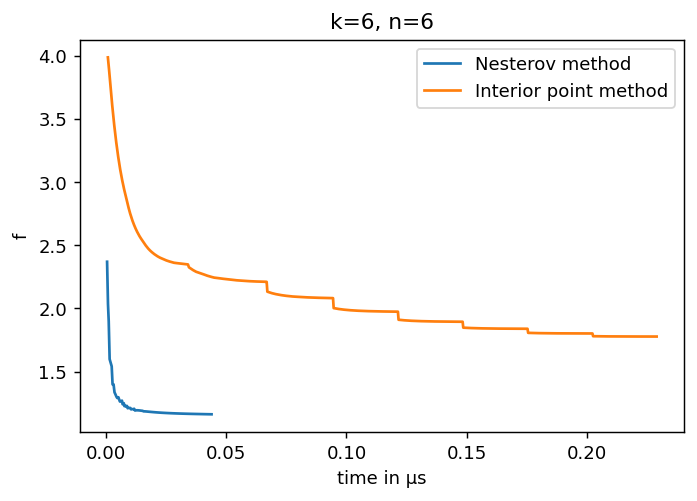

CPU times: user 388 ms, sys: 82 µs, total: 388 ms
Wall time: 385 ms


In [62]:
%%time

k = np.random.randint(10)
n = np.random.randint(10)

A = np.random.randn(k, n)
b = np.random.randn(k)
x_0 = np.random.randn(n)

# параметры для метода Нестерова
norm = np.sqrt(np.max(np.linalg.eigh(A.T @ A)[0]))
mu = 1
L = norm / mu
f_mu = lambda x, mu: mu * np.log(np.sum(np.exp((A @ x - b) / mu))/k)
f_mu_grad = lambda x, mu: A.T @ np.exp((A @ x - b) / mu) / np.sum(np.exp((A @ x - b) / mu))

x0 = np.random.randn(n)
x_nest, conv_nest, time_nest = Nesterov_method(f_mu_grad, x0, max_iter)

# параметры для метода нутренней точки
s = 0.1
x0 = x_0 + np.random.normal(0, sigma/n, n)
t0 = np.max(A @ x0 - b) + 0.1

alpha = 0.01
nu = 0.01
tol_barrier = 1e-2 
tol_newton = 1e-5

f_tilde = lambda s, x, t: t - np.sum(s* np.log(-A @ x + b + t)) - s*np.log(-np.linalg.norm(x-x_0)**2 + sigma**2)
f_tilde_grad = lambda s, x, t: np.hstack([np.sum([-s*A[i]/(A[i] @ x - b[i] - t) for i in range(k)], axis = 0) - s*2*(x-x_0)/(np.linalg.norm(x-x_0)**2-sigma**2),1 + np.sum(s / (A @ x - b - t))]) 
f_tilde_hess = lambda s, x, t: np.vstack([np.hstack([np.sum([s * (A[i].reshape(-1,1) @ A[i].reshape(1,-1)) / (A[i] @ x - b[i] -t)**2 for i in range(k)],axis = 0) - s*(2 * (np.linalg.norm(x-x_0)**2 - sigma**2) * np.eye(n) - 4 * (x-x_0).reshape(-1,1) @ (x-x_0).reshape(1,-1)) / (np.linalg.norm(x-x_0)**2 - sigma**2)**2, np.sum([-s*A[i]/(A[i] @ x - b[i] - t)**2 for i in range(k)], axis = 0).reshape(-1,1)]), np.hstack([np.sum([-s*A[i]/(A[i] @ x - b[i] - t)**2 for i in range(k)], axis = 0) , np.sum(s / (A @ x - b - t)**2)]) ])

x_int_point, conv_x_int_point, conv_t_int_point, conv_s_int_point, time_int_point =  Interior_point_method(f_tilde_grad, f_tilde_hess, x0, t0, s, alpha, nu, tol_barrier, tol_newton, max_iter)

values = []
for i in range(len(conv_x_int_point)-1):
    values.append(f_tilde(conv_s_int_point[i],conv_x_int_point[1+i],conv_t_int_point[1+i]))
    
plt.figure(figsize = (6, 4), dpi = 130)
plt.plot(time_nest[1:],[f_mu(x,mu) for x in conv_nest[1:]], label = "Nesterov method")
plt.plot(time_int_point[1:], values, label = "Interior point method")
plt.ylabel("f")
plt.xlabel("time in μs")
plt.title("k="+str(k)+", n="+str(n))
plt.legend()
plt.show()

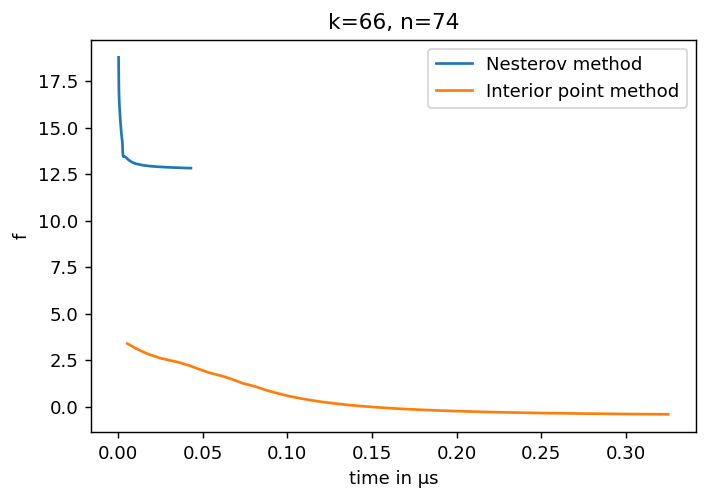

CPU times: user 1.06 s, sys: 19.6 ms, total: 1.08 s
Wall time: 481 ms


In [63]:
%%time

k = np.random.randint(100)
n = np.random.randint(100)

A = np.random.randn(k, n)
b = np.random.randn(k)
x_0 = np.random.randn(n)

# параметры для метода Нестерова
norm = np.sqrt(np.max(np.linalg.eigh(A.T @ A)[0]))
mu = 1
L = norm / mu
f_mu = lambda x, mu: mu * np.log(np.sum(np.exp((A @ x - b) / mu))/k)
f_mu_grad = lambda x, mu: A.T @ np.exp((A @ x - b) / mu) / np.sum(np.exp((A @ x - b) / mu))

x0 = np.random.randn(n)
x_nest, conv_nest, time_nest = Nesterov_method(f_mu_grad, x0, max_iter)

# параметры для метода нутренней точки
s = 0.1
x0 = x_0 + np.random.normal(0, sigma/n, n)
t0 = np.max(A @ x0 - b) + 0.1

alpha = 0.01
nu = 0.01
tol_barrier = 1e-2 
tol_newton = 1e-5

f_tilde = lambda s, x, t: t - np.sum(s* np.log(-A @ x + b + t)) - s*np.log(-np.linalg.norm(x-x_0)**2 + sigma**2)
f_tilde_grad = lambda s, x, t: np.hstack([np.sum([-s*A[i]/(A[i] @ x - b[i] - t) for i in range(k)], axis = 0) - s*2*(x-x_0)/(np.linalg.norm(x-x_0)**2-sigma**2),1 + np.sum(s / (A @ x - b - t))]) 
f_tilde_hess = lambda s, x, t: np.vstack([np.hstack([np.sum([s * (A[i].reshape(-1,1) @ A[i].reshape(1,-1)) / (A[i] @ x - b[i] -t)**2 for i in range(k)],axis = 0) - s*(2 * (np.linalg.norm(x-x_0)**2 - sigma**2) * np.eye(n) - 4 * (x-x_0).reshape(-1,1) @ (x-x_0).reshape(1,-1)) / (np.linalg.norm(x-x_0)**2 - sigma**2)**2, np.sum([-s*A[i]/(A[i] @ x - b[i] - t)**2 for i in range(k)], axis = 0).reshape(-1,1)]), np.hstack([np.sum([-s*A[i]/(A[i] @ x - b[i] - t)**2 for i in range(k)], axis = 0) , np.sum(s / (A @ x - b - t)**2)]) ])

x_int_point, conv_x_int_point, conv_t_int_point, conv_s_int_point, time_int_point =  Interior_point_method(f_tilde_grad, f_tilde_hess, x0, t0, s, alpha, nu, tol_barrier, tol_newton, max_iter)

values = []
for i in range(len(conv_x_int_point)-1):
    values.append(f_tilde(conv_s_int_point[i],conv_x_int_point[1+i],conv_t_int_point[1+i]))
    
plt.figure(figsize = (6, 4), dpi = 130)
plt.plot(time_nest[1:],[f_mu(x,mu) for x in conv_nest[1:]], label = "Nesterov method")
plt.plot(time_int_point[1:], values, label = "Interior point method")
plt.ylabel("f")
plt.xlabel("time in μs")
plt.title("k="+str(k)+", n="+str(n))
plt.legend()
plt.show()

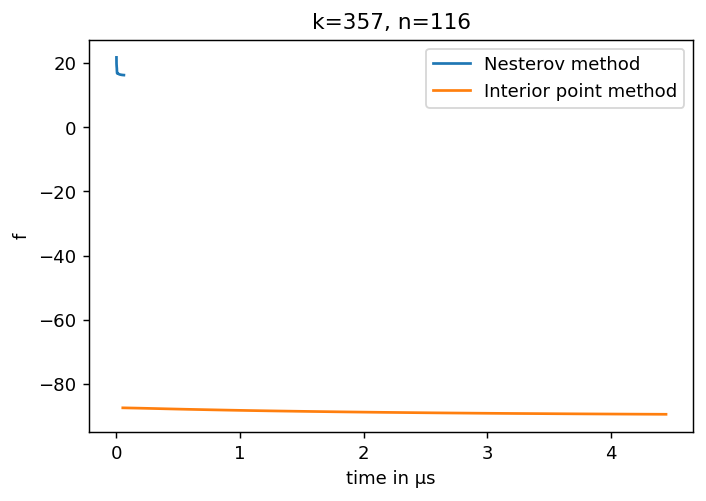

CPU times: user 16.9 s, sys: 1.68 s, total: 18.6 s
Wall time: 4.66 s


In [64]:
%%time

k = np.random.randint(1000)
n = np.random.randint(1000)

A = np.random.randn(k, n)
b = np.random.randn(k)
x_0 = np.random.randn(n)

# параметры для метода Нестерова
norm = np.sqrt(np.max(np.linalg.eigh(A.T @ A)[0]))
mu = 1
L = norm / mu
f_mu = lambda x, mu: mu * np.log(np.sum(np.exp((A @ x - b) / mu))/k)
f_mu_grad = lambda x, mu: A.T @ np.exp((A @ x - b) / mu) / np.sum(np.exp((A @ x - b) / mu))

x0 = np.random.randn(n)
x_nest, conv_nest, time_nest = Nesterov_method(f_mu_grad, x0, max_iter)

# параметры для метода нутренней точки
s = 0.1
x0 = x_0 + np.random.normal(0, sigma/n, n)
t0 = np.max(A @ x0 - b) + 0.1

alpha = 0.01
nu = 0.01
tol_barrier = 1e-2 
tol_newton = 1e-5

f_tilde = lambda s, x, t: t - np.sum(s* np.log(-A @ x + b + t)) - s*np.log(-np.linalg.norm(x-x_0)**2 + sigma**2)
f_tilde_grad = lambda s, x, t: np.hstack([np.sum([-s*A[i]/(A[i] @ x - b[i] - t) for i in range(k)], axis = 0) - s*2*(x-x_0)/(np.linalg.norm(x-x_0)**2-sigma**2),1 + np.sum(s / (A @ x - b - t))]) 
f_tilde_hess = lambda s, x, t: np.vstack([np.hstack([np.sum([s * (A[i].reshape(-1,1) @ A[i].reshape(1,-1)) / (A[i] @ x - b[i] -t)**2 for i in range(k)],axis = 0) - s*(2 * (np.linalg.norm(x-x_0)**2 - sigma**2) * np.eye(n) - 4 * (x-x_0).reshape(-1,1) @ (x-x_0).reshape(1,-1)) / (np.linalg.norm(x-x_0)**2 - sigma**2)**2, np.sum([-s*A[i]/(A[i] @ x - b[i] - t)**2 for i in range(k)], axis = 0).reshape(-1,1)]), np.hstack([np.sum([-s*A[i]/(A[i] @ x - b[i] - t)**2 for i in range(k)], axis = 0) , np.sum(s / (A @ x - b - t)**2)]) ])

x_int_point, conv_x_int_point, conv_t_int_point, conv_s_int_point, time_int_point =  Interior_point_method(f_tilde_grad, f_tilde_hess, x0, t0, s, alpha, nu, tol_barrier, tol_newton, max_iter)

values = []
for i in range(len(conv_x_int_point)-1):
    values.append(f_tilde(conv_s_int_point[i],conv_x_int_point[1+i],conv_t_int_point[1+i]))
    
plt.figure(figsize = (6, 4), dpi = 130)
plt.plot(time_nest[1:],[f_mu(x,mu) for x in conv_nest[1:]], label = "Nesterov method")
plt.plot(time_int_point[1:], values, label = "Interior point method")
plt.ylabel("f")
plt.xlabel("time in μs")
plt.title("k="+str(k)+", n="+str(n))
plt.legend()
plt.show()

# Выводы

Сразу отмечу, что не все графики репрезентативны, так как, видимо, при написании методов была учтена заваисимость от конкретных параметров $k$ и $n$. Поэтому гиперпараметры методов не были выбраны так, чтоюы они подходили для любых $k$ и $n$. В силу нехватки времени этот момент подправить не успел. На некоторых графиках заметно, что функции убывают из раных точек, так как представлены значния именно приближённых функций, которые используются в каждом методе, они всё же отличаются. Заметил, что скорость работы алгоритма внутренней точки линейно зависит от $k$. Общий комментарий: большинство графиков отражает квадратичную сходимость методов 